### Ordinary derivative of the function

- The definition of the derivative of the function **f** at the point **x**.
- Represents the limit of the average rate of change (or average slope) of the function as the interval
h approaches zero.
- The process of finding this limit is known as differentiation
- Limit, if it exists, gives you the instantaneous rate of change of the function at **x**
- The process of finding this limit is known as differentiation.


![derivative](./img/derivative_of_the%20function.png)


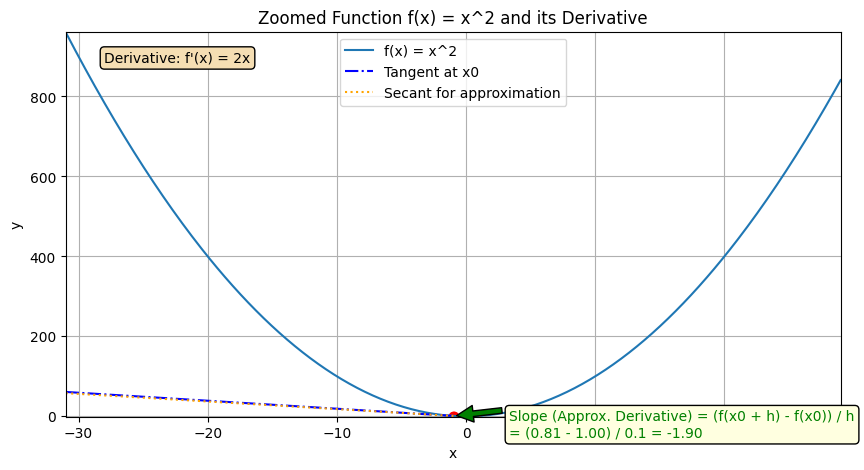

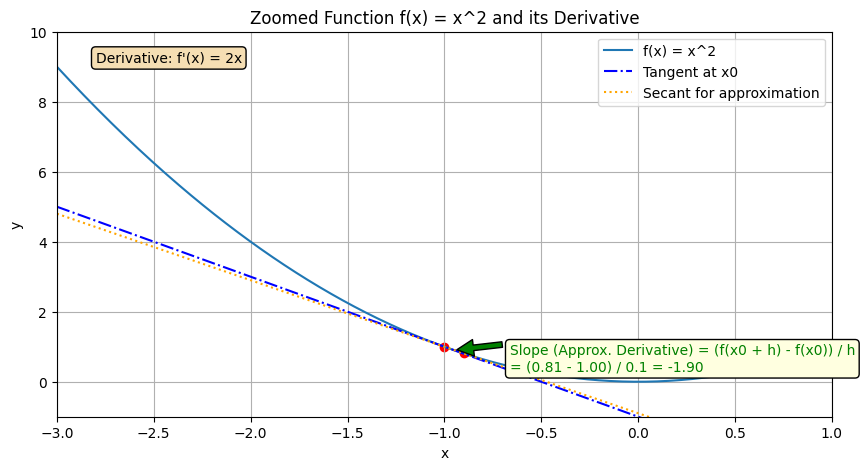

In [42]:
import numpy as np
import matplotlib.pyplot as plt

# Define the function
def quadratic_fun(x):
    return x ** 2

# Define the actual derivative of the function using the Power Rule.
# For f(x) = x^2, the derivative f'(x) = 2x.
def actual_derivative_quad_fun(x):
    return 2 * x

# Define the derivative using the limit definition.
# This function approximates the derivative numerically using a small h value.
# It applies the difference quotient method to estimate the slope (derivative)
# of the function f at a specific point x.
def approximate_derivative(f, x, h=1e-5):
    return (f(x + h) - f(x)) / h

def plot_function_and_derivative_zoomed(f, actual_derivative, approx_deriv, x0, h, zoom_factor):
    # Generate x values around x0
    x = np.linspace(x0 - zoom_factor, x0 + zoom_factor, 400)
    y = f(x)
   # dy = actual_derivative(x)
    
    # Compute the tangent line at x0
    tangent_actual = actual_derivative(x0) * (x - x0) + f(x0)
    
    # Compute the slope of the secant line for the approximate derivative
    slope_secant = (f(x0 + h) - f(x0)) / h

    # Extend the secant line across the plotted range
    secant_line = slope_secant * (x - x0) + f(x0)

    # Plot the function, derivative, and tangent line
    plt.figure(figsize=(10, 5))
    plt.plot(x, y, label='f(x) = x^2')
    plt.plot(x, tangent_actual, label="Tangent at x0", linestyle='-.', color='blue')
    plt.plot(x, secant_line, label="Secant for approximation", linestyle=':', color='orange')
    
    # Highlight the points used for the secant line
    plt.scatter([x0, x0 + h], [f(x0), f(x0 + h)], color='red')
    plt.text(0.05, 0.95, "Derivative: f'(x) = 2x", horizontalalignment='left', verticalalignment='top', transform=plt.gca().transAxes, fontsize=10, bbox=dict(boxstyle="round", facecolor='wheat', edgecolor='black'))

    # Annotate the slope of the secant line in green
    approx_deriv_formula = f"Slope (Approx. Derivative) = (f(x0 + h) - f(x0)) / h\n= ({f(x0 + h):.2f} - {f(x0):.2f}) / {h} = {slope_secant:.2f}"
    plt.annotate(approx_deriv_formula,
             xy=(x0 + h / 2, (f(x0) + f(x0 + h)) / 2), xycoords='data',
             xytext=(40, -15), textcoords='offset points',
             arrowprops=dict(facecolor='green', shrink=0.05),
             fontsize=10, color='green', bbox=dict(boxstyle="round", facecolor='lightyellow', edgecolor='black'))

    plt.title("Zoomed Function f(x) = x^2 and its Derivative")
    plt.xlabel('x')
    plt.ylabel('y')
    plt.legend()
    plt.grid(True)
    
    # Adjust the limits based on the zoom factor
    plt.xlim(x0 - zoom_factor, x0 + zoom_factor)
    plt.ylim(min(y) - 1, max(y) + 1)
    
    plt.show()

# Example usage
x0 = -1  # Point at which we want to calculate the derivative
h = 0.1    # Step size for the secant line calculation

# Calculate the approximate derivative at x0 using a small h value
approx_deriv = approximate_derivative(quadratic_fun, x0, h)

# Plot with a larger zoom factor
plot_function_and_derivative_zoomed(quadratic_fun, actual_derivative_quad_fun, approx_deriv, x0, h, zoom_factor=30)

# Plot with a smaller zoom factor
plot_function_and_derivative_zoomed(quadratic_fun, actual_derivative_quad_fun, approx_deriv, x0, h, zoom_factor=2)


### Partial derivative example

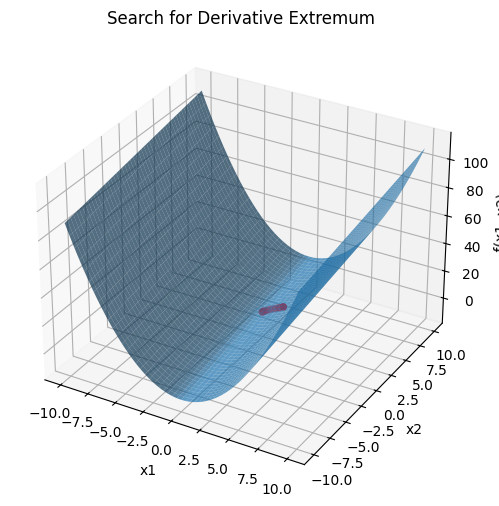

(1.6, 2.9, array([4, 1]))
(1.28, 2.8, array([3.2, 1. ]))
(1.024, 2.6999999999999997, array([2.56, 1.  ]))
(0.8192, 2.5999999999999996, array([2.048, 1.   ]))
(0.65536, 2.4999999999999996, array([1.6384, 1.    ]))
(0.5242880000000001, 2.3999999999999995, array([1.31072, 1.     ]))
(0.4194304000000001, 2.2999999999999994, array([1.048576, 1.      ]))
(0.33554432000000006, 2.1999999999999993, array([0.8388608, 1.       ]))
(0.26843545600000007, 2.099999999999999, array([0.67108864, 1.        ]))
(0.21474836480000006, 1.9999999999999991, array([0.53687091, 1.        ]))


In [41]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Define the quadratic function with two variables
def custom_fun(x1, x2):
    return x1 ** 2 + x2

#def full_derivative    

# Define the actual partial derivative of the function with respect to x1.
def actual_partial_derivative_x1(x1):
    return 2 * x1

# Define the actual partial derivative of the function with respect to x2.
# For demonstation partial derivative, imagine x2 is constant
def actual_partial_derivative_x2(x2):
    return 1

# Define the gradient of the function
def gradient_function(x1, x2):
    return np.array([actual_partial_derivative_x1(x1), actual_partial_derivative_x2(x2)])

def directional_derivative(f_gradient, x1, x2, direction):
    """
    Computes the directional derivative of the function at point (x1, x2) in the given direction.

    Args:
    f_gradient: The gradient function of f.
    x1, x2: The point at which the derivative is to be computed.
    direction: The direction vector in which to compute the derivative.

    Returns:
    The directional derivative of f at (x1, x2) in the given direction.
    """
    grad = f_gradient(x1, x2)  # Compute the gradient at (x1, x2)
    direction = np.array(direction) / np.linalg.norm(direction)  # Normalize the direction vector
    return np.dot(grad, direction)  # Dot product of gradient and direction vector

#def total_derivative(x1, x2, dx2_dx1):
#    partial_x1 = 2 * x1  # partial derivative with respect to x1
#    partial_x2 = 1       # partial derivative with respect to x2
#    return partial_x1 + partial_x2 * dx2_dx1    

def find_derivative_extremum(f_gradient, start_x1, start_x2, steps, step_size, find_max=False):
    """
    Finds the extremum of the partial derivative using gradient descent/ascent.

    Args:
    f_gradient: The gradient function of f.
    start_x1, start_x2: The starting point.
    steps: Number of steps to perform in the search.
    step_size: The size of each step.
    find_max: If True, finds the maximum; otherwise, finds the minimum.

    Returns:
    A list of tuples containing x1, x2, and gradient values at each step.
    """
    x1, x2 = start_x1, start_x2
    history = []

    for i in range(steps):
        grad = f_gradient(x1, x2)
        
        # For maximum, add the gradient; for minimum, subtract the gradient
        if find_max:
            x1 += step_size * grad[0]
            x2 += step_size * grad[1]
        else:
            x1 -= step_size * grad[0]
            x2 -= step_size * grad[1]

        history.append((x1, x2, grad))

    return history

def plot_derivative_extremum_search(history, f, f_gradient):
    """
    Plots the extremum search on the function surface along with the history of steps.

    Args:
    history: The list of tuples containing x1, x2, and gradient values at each step.
    f: The function whose extremum is being searched.
    f_gradient: The gradient function of f.
    """
    x = np.linspace(-10, 10, 400)
    y = np.linspace(-10, 10, 400)
    X, Y = np.meshgrid(x, y)
    Z = f(X, Y)

    fig = plt.figure(figsize=(12, 6))
    ax = fig.add_subplot(111, projection='3d')
    ax.plot_surface(X, Y, Z, alpha=0.7)

    x1_history, x2_history = zip(*[(step[0], step[1]) for step in history])
    z_history = [f(x1, x2) for x1, x2 in zip(x1_history, x2_history)]
    
    ax.scatter(x1_history, x2_history, z_history, color='red')

    ax.set_xlabel('x1')
    ax.set_ylabel('x2')
    ax.set_zlabel('f(x1, x2)')
    ax.set_title("Search for Derivative Extremum")

    plt.show()

# Example usage
      


# Example usage
x1 = 2  # x1 value
x2 = 3  # x2 value

directional_derivative(gradient_function, x1, x2, [1, 1])

# Example usage for finding minimum extremum
history = find_derivative_extremum(gradient_function, start_x1=x1, start_x2=x2, steps=10, step_size=0.1, find_max=False)
plot_derivative_extremum_search(history, custom_fun, gradient_function)

for h in history:
    print(h)